# 5.2 Performance Metrics

## 5.2.1 Classification Metrics


### Confusion Matrix

A confusion matrix is a table used to describe the performance of a classification model. It summarizes the count of the correct and incorrect predictions broken down by each class. The entries in the confusion matrix are as follows:

- **TP (True Positives)**: The model correctly predicted the positive class.
- **FP (False Positives)**: The model incorrectly predicted the positive class.
- **TN (True Negatives)**: The model correctly predicted the negative class.
- **FN (False Negatives)**: The model incorrectly predicted the negative class.

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| **Actual Positive** | TP                 | FN                 |
| **Actual Negative** | FP                 | TN                 |

___
___

### Readings:
- [Comprehensive Guide to Data Analysis and Classification Metrics](https://medium.com/@yash9439/2-a-comprehensive-guide-to-data-analysis-and-classification-metrics-38bcdfe6d4b8)
- [Classification Metrics: The Complete Guide](https://readmedium.com/en/https:/towardsdatascience.com/classification-metrics-the-complete-guide-for-aspiring-data-scientists-9f02eab796ae)
- [The Explanation You Need on Binary Classification Metrics](https://readmedium.com/en/https:/towardsdatascience.com/the-explanation-you-need-on-binary-classification-metrics-321d280b590f)
- [Comprehensive Guide to Multiclass Classification Metrics](https://readmedium.com/en/https:/towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd)
___
___

### Explanation of Various Classification Metrics

1. **Accuracy**: The ratio of correctly predicted instances to the total instances. It is useful when classes are well-balanced.
   $$ \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Instances}} $$

2. **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. High precision indicates a low false positive rate.
   $$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

3. **Recall (Sensitivity)**: The ratio of correctly predicted positive observations to all observations in the actual class. High recall indicates a low false negative rate.
   $$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

4. **F1-Score**: The harmonic mean of precision and recall. It balances precision and recall, and is useful when the class distribution is imbalanced.
   $$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

5. **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**: Measures the ability of a classifier to distinguish between classes. A higher AUC indicates a better performing model.


### Scenarios and Examples of Using Each Classification Metric

1. **Accuracy**:
   - **Scenario**: Suitable for balanced datasets.
   - **Example**: If a dataset has 1000 instances, and the model correctly predicts 900 instances, the accuracy is 90%.

2. **Precision**:
   - **Scenario**: Important in cases where false positives are costly.
   - **Example**: In a spam detection system, precision is crucial to avoid classifying legitimate emails as spam.

3. **Recall**:
   - **Scenario**: Important in cases where false negatives are costly.
   - **Example**: In a medical diagnosis system, recall is crucial to ensure that actual patients are identified.

4. **F1-Score**:
   - **Scenario**: Useful when the class distribution is imbalanced and a balance between precision and recall is needed.
   - **Example**: In a fraud detection system, where both false positives and false negatives are costly, the F1-score helps balance the trade-off.

5. **ROC-AUC**:
   - **Scenario**: Useful for evaluating the performance of binary classifiers.
   - **Example**: In a binary classification task, such as predicting whether a customer will buy a product, the ROC-AUC provides a measure of how well the model can distinguish between the two classes.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
iris = load_iris()
X = iris.data
y = (iris.target == 2).astype(int)  # Binary classification: class 2 vs. rest

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
ROC-AUC: 1.00


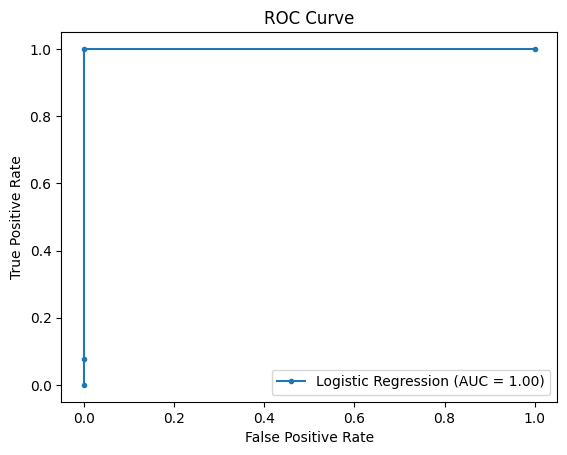

In [6]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### The Above plot shows a perfect classifier (with 100% accuracy), since Iris dataset is a really simple dataset, many different algorithms perform perfectly on it
___

### Let's take another example of the `Breast Cancer` Dataset from `scikit-learn`

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [8]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Train a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [11]:
# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
ROC-AUC: 1.00


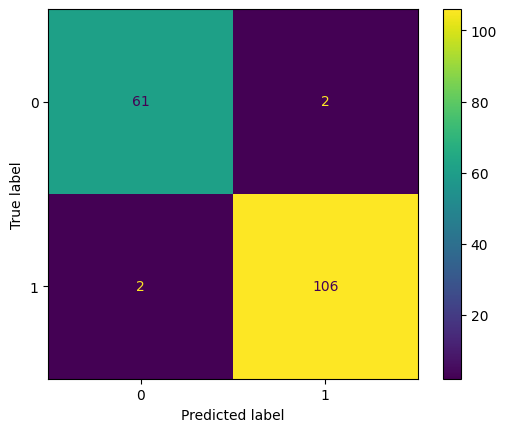

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

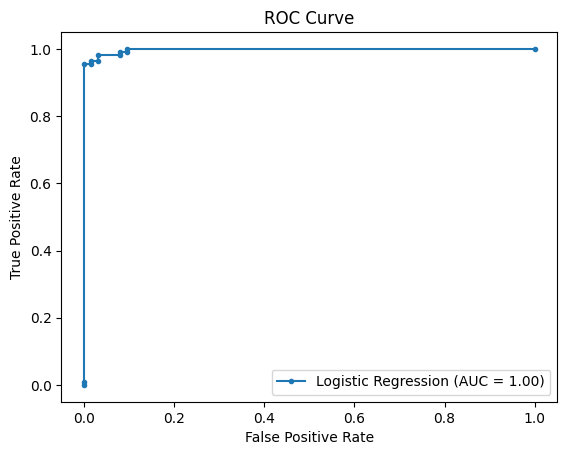

In [13]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Conclusion

Classification metrics are essential tools for evaluating the performance of machine learning models. Each metric provides different insights into the model's performance, and the choice of metric depends on the specific problem and context. Accuracy is suitable for balanced datasets, precision and recall are crucial when dealing with imbalanced datasets, the F1-score offers a balance between precision and recall, and the ROC-AUC provides a measure of the model's ability to distinguish between classes. By understanding and applying these metrics, practitioners can make informed decisions about model selection and improvement.
